![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Proyecto 1 - Predicción de precios de vehículos usados

En este proyecto podrán poner en práctica sus conocimientos sobre modelos predictivos basados en árboles y ensambles, y sobre la disponibilización de modelos. Para su desasrrollo tengan en cuenta las instrucciones dadas en la "Guía del proyecto 1: Predicción de precios de vehículos usados".

**Entrega**: La entrega del proyecto deberán realizarla durante la semana 4. Sin embargo, es importante que avancen en la semana 3 en el modelado del problema y en parte del informe, tal y como se les indicó en la guía.

Para hacer la entrega, deberán adjuntar el informe autocontenido en PDF a la actividad de entrega del proyecto que encontrarán en la semana 4, y subir el archivo de predicciones a la [competencia de Kaggle](https://www.kaggle.com/t/4bd64c1deb3c4ffb8ca7ff93c1f1497d).

## Datos para la predicción de precios de vehículos usados

En este proyecto se usará el conjunto de datos de Car Listings de Kaggle, donde cada observación representa el precio de un automóvil teniendo en cuenta distintas variables como: año, marca, modelo, entre otras. El objetivo es predecir el precio del automóvil. Para más detalles puede visitar el siguiente enlace: [datos](https://www.kaggle.com/jpayne/852k-used-car-listings).

## Ejemplo predicción conjunto de test para envío a Kaggle

En esta sección encontrarán el formato en el que deben guardar los resultados de la predicción para que puedan subirlos a la competencia en Kaggle.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación librerías
import pandas as pd
import numpy as np

In [3]:
# Carga de datos de archivo .csv
dataTraining = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/dataTrain_carListings.zip')
dataTesting = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/dataTest_carListings.zip', index_col=0)

In [4]:
# Visualización datos de entrenamiento (Training)
dataTraining.head()

,Price,Year,Mileage,State,Make,Model
0,34995,2017,9913,FL,Jeep,Wrangler
1,37895,2015,20578,OH,Chevrolet,Tahoe4WD
2,18430,2012,83716,TX,BMW,X5AWD
3,24681,2014,28729,OH,Cadillac,SRXLuxury
4,26998,2013,64032,CO,Jeep,Wrangler


In [5]:
# Visualización datos de test o "XTest"
dataTesting.head()

,Year,Mileage,State,Make,Model
ID,,,,,
0,2014,31909,MD,Nissan,MuranoAWD
1,2017,5362,FL,Jeep,Wrangler
2,2014,50300,OH,Ford,FlexLimited
3,2004,132160,WA,BMW,5
4,2015,25226,MA,Jeep,Grand


In [6]:
# EJEMPLO DE OUTUT
# Predicción del conjunto de test - acá se genera un número aleatorio como ejemplo "yTest"

#np.random.seed(42)
#y_pred = pd.DataFrame(np.random.rand(dataTesting.shape[0]) * 75000 + 5000, index=dataTesting.index, columns=['Price'])

In [7]:
# EJEMPLO DE OUTUT
# Guardar predicciones en formato exigido en la competencia de kaggle

#y_pred.to_csv('test_submission.csv', index_label='ID')


## Exploracion de datos

In [8]:
# Cantidad de lineas
dataTraining.shape

(400000, 6)

In [9]:
# Descripcion de la data
dataTraining.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Price    400000 non-null  int64 
 1   Year     400000 non-null  int64 
 2   Mileage  400000 non-null  int64 
 3   State    400000 non-null  object
 4   Make     400000 non-null  object
 5   Model    400000 non-null  object
dtypes: int64(3), object(3)
memory usage: 18.3+ MB


In [10]:
# Verificando valores faltantes
dataTraining.isna().sum()

Price      0
Year       0
Mileage    0
State      0
Make       0
Model      0
dtype: int64

In [11]:
#Descripcion de las variables numéricas
dataTraining.describe()

,Price,Year,Mileage
count,400000.000000,400000.000000,4.000000e+05
mean,21146.919312,2013.198125,5.507296e+04
std,10753.664940,3.292326,4.088102e+04
min,5001.000000,1997.000000,5.000000e+00
25%,13499.000000,2012.000000,2.584100e+04
50%,18450.000000,2014.000000,4.295500e+04
75%,26999.000000,2016.000000,7.743300e+04
max,79999.000000,2018.000000,2.457832e+06


In [12]:
dataTraining.groupby("Year")["Price"].count()


Year
1997       98
1998      169
1999      298
2000      474
2001      747
2002     1188
2003     1927
2004     3423
2005     4881
2006     7185
2007    11003
2008    13509
2009    10676
2010    16650
2011    23828
2012    30907
2013    32307
2014    68181
2015    71441
2016    55947
2017    44790
2018      371
Name: Price, dtype: int64

In [95]:
print("Número de fabricantes en base de entrenamiento: " + str(dataTraining["Make"].value_counts().count()))
print("Número de modelos de vehículos en base de entrenamiento: " + str(dataTraining["Model"].value_counts().count()))
print("Número de estados: " + str(dataTraining["State"].value_counts().count()))

Número de fabricantes en base de entrenamiento: 38
Número de modelos de vehículos en base de entrenamiento: 525
Número de estados: 51


In [14]:
print("Fabricantes con más registros en la base de entrenamiento:")
print(dataTraining["Make"].value_counts().head())


Fabricantes con más registros en la base de entrenamiento:
Ford         62899
Chevrolet    58383
Toyota       45941
Honda        33191
Jeep         24369
Name: Make, dtype: int64


In [15]:
print("Modelos de vehículos con más registros en la base de entrenamiento:")
print(dataTraining["Model"].value_counts().head())

Modelos de vehículos con más registros en la base de entrenamiento:
Silverado    18085
Grand        12344
Sierra        8409
Accord        7357
F-1504WD      6684
Name: Model, dtype: int64


In [16]:
#Tomando como muestra el año 2015, se revisa la disperción de la variable respuesta por fabricante
make_price = dataTraining[dataTraining.Year == 2015].groupby("Make")["Price"].describe().sort_values(by=['count'], ascending= False)
make_price["coef_var"] = make_price["std"]/make_price["mean"]
make_price.head(10)


,count,mean,std,min,25%,50%,75%,max,coef_var
Make,,,,,,,,,
Chevrolet,10744.0,28821.217610,12180.971509,5991.0,17800.00,28500.0,37800.00,79990.0,0.422639
Ford,10393.0,27471.536226,10740.673892,6995.0,17975.00,26997.0,33995.00,79999.0,0.390975
Toyota,7981.0,21677.669214,8000.133234,8200.0,15200.00,18599.0,27988.00,64888.0,0.369050
Honda,6775.0,20458.938745,5435.772254,9950.0,15996.00,19350.0,24455.50,45480.0,0.265692
GMC,4716.0,35092.651824,11112.206614,11891.0,25993.75,34995.0,42995.00,72995.0,0.316653
Jeep,4668.0,28196.073907,7430.402656,8499.0,24789.75,29471.0,32627.25,79994.0,0.263526
Kia,3733.0,15766.375301,3387.912231,5892.0,13500.00,15396.0,17550.00,32150.0,0.214882
Lexus,3614.0,33015.885722,7180.882917,16088.0,28499.00,32488.5,35997.00,69995.0,0.217498
Volkswagen,2520.0,16049.100000,3665.394392,6995.0,13250.00,15822.5,18391.25,34495.0,0.228386


Existe una gran dispersión de los valores que toma el precio por fabricante.

In [17]:
#Tomando como muestra el año 2015, se revisa la disperción de la variable respuesta por modelo
model_price = dataTraining[dataTraining.Year == 2015].groupby("Model")["Price"].describe().sort_values(by=['count'], ascending= False)
model_price["coef_var"] = model_price["std"]/model_price["mean"]
model_price.head(10)

,count,mean,std,min,25%,50%,75%,max,coef_var
Model,,,,,,,,,
Silverado,4012.0,34533.281904,7889.541162,15900.0,29390.25,32493.0,37988.25,67995.0,0.228462
Grand,2301.0,28023.986528,6739.625525,9588.0,25000.00,28950.0,31499.00,61975.0,0.240495
Sierra,1877.0,38468.481620,8165.791511,17900.0,32990.00,37691.0,41980.00,72995.0,0.212272
F-1504WD,1551.0,36461.205029,5771.081324,21988.0,31995.00,35493.0,40986.50,69998.0,0.158280
Accord,1490.0,18291.570470,2406.929607,11997.0,16554.00,17991.5,19959.00,27995.0,0.131587
Wrangler,1426.0,33326.608696,4396.209021,21999.0,30415.25,32745.5,35771.00,79994.0,0.131913
EquinoxFWD,1276.0,17469.612853,2188.471233,9000.0,15997.00,17464.5,18700.00,26850.0,0.125273
Civic,1272.0,15395.072327,2349.005097,9950.0,13843.50,14995.0,16582.75,23556.0,0.152582
Jetta,1243.0,14518.263878,2889.258490,6995.0,12411.00,14331.0,16277.50,25995.0,0.199009


Existe disperción de los valores que toma el precio por modelo. Sin embargo, es menor que analizando solo fabricante.

In [18]:
print(dataTraining.groupby(["Make","Model"])["Price"].count())
print("Existen 11 nombres de modelos de vehículos repetidos")

Make   Model  
Acura  MDX4WD     276
       MDXAWD     807
       RDXAWD     490
       RDXFWD     313
       TL4dr      292
                 ... 
Volvo  XC60T6     258
       XC704dr     76
       XC90AWD    350
       XC90FWD     94
       XC90T6      68
Name: Price, Length: 536, dtype: int64
Existen 11 nombres de modelos de vehículos repetidos


## Codificación de variables categóricas (Binary encoding)

In [19]:
dataTraining.head()

,Price,Year,Mileage,State,Make,Model
0,34995,2017,9913,FL,Jeep,Wrangler
1,37895,2015,20578,OH,Chevrolet,Tahoe4WD
2,18430,2012,83716,TX,BMW,X5AWD
3,24681,2014,28729,OH,Cadillac,SRXLuxury
4,26998,2013,64032,CO,Jeep,Wrangler


In [20]:
# dado que la información del modelo del vehículo debería estar contenida dentro de la información del fabricante, se eliminará esta última 
# hipótesis: la información por estado no es muy relevante en el precio de los vehículos

dataTraining2 = dataTraining.drop(["Make","State"], axis = 1)


In [21]:
#pip install --upgrade category_encoders

In [22]:
#  encoding binario para la variable modelo

from category_encoders import *

enc = BinaryEncoder(cols=['Model']).fit(dataTraining2)

# transformación de la tabla
dataTraining3 = enc.transform(dataTraining2)
dataTraining3

,Price,Year,Mileage,Model_0,Model_1,Model_2,Model_3,Model_4,Model_5,Model_6,Model_7,Model_8,Model_9
0,34995,2017,9913,0,0,0,0,0,0,0,0,0,1
1,37895,2015,20578,0,0,0,0,0,0,0,0,1,0
2,18430,2012,83716,0,0,0,0,0,0,0,0,1,1
3,24681,2014,28729,0,0,0,0,0,0,0,1,0,0
4,26998,2013,64032,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,29900,2015,25287,0,1,0,0,0,1,0,1,1,1
399996,17688,2015,17677,0,0,0,1,1,0,1,0,0,0
399997,24907,2014,66688,0,0,0,1,1,1,0,1,1,1
399998,11498,2014,37872,0,0,0,0,0,0,1,1,0,0


### Codificación de tabla Test

In [24]:
dataTesting2 = dataTesting.drop(["Make","State"], axis = 1)

enc = BinaryEncoder(cols=['Model']).fit(dataTesting2)

# transform the dataset
dataTesting3 = enc.transform(dataTesting2)


### Separacion de X_Train, X_Validation
Se separa la tabla de dataTraining3 para entrenar y calibrar el modelo 

In [25]:
# Separación de variables predictoras (X) y variable de interes (y)

X = dataTraining3.drop(columns='Price')
Y = dataTraining3['Price']

X.shape, Y.shape

((400000, 12), (400000,))

In [27]:
from sklearn.model_selection import train_test_split

X_Train, X_Val, Y_Train, Y_Val = train_test_split(X, Y, test_size = 0.25)

## Random Forest como algoritmo predictor

Modelo sin calibrar parámetros:

In [94]:
from sklearn.ensemble import RandomForestRegressor

RFR = RandomForestRegressor()

RFR.fit(X_Train, Y_Train)

RandomForestRegressor()

In [65]:
y_pred = RFR.predict(X_Val)

In [66]:
from sklearn.metrics import mean_squared_error
 
mse_0 = mean_squared_error(Y_Val, y_pred, squared=False)
mse_0

4280.443042800376

### Calibración de parámetros

In [44]:
RFR.fit(X_Val, Y_Val)


RandomForestRegressor()

In [48]:
from sklearn.model_selection import cross_val_score

cross_val_score(RFR, X_Val, Y_Val).mean()

0.81732162031698

In [56]:
max_depths = np.arange(1,10,1)
max_features_r = np.arange(1,X_Val.shape[1]+1,1)
n_estimators_r = np.arange(1,220,10)

In [70]:
print(max_depths)
print(max_features_r)
print(n_estimators_r)

[1 2 3 4 5 6 7 8 9]
[ 1  2  3  4  5  6  7  8  9 10 11 12]
[  1  11  21  31  41  51  61  71  81  91 101 111 121 131 141 151 161 171
 181 191 201 211]


In [58]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':max_depths , 'max_features': max_features_r, 'n_estimators': n_estimators_r}

RF_calib = GridSearchCV(RFR,parameters, n_jobs=-1)
RF_calib.fit(X_Val,Y_Val)

GridSearchCV(estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_features': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
                         'n_estimators': array([  1,  11,  21,  31,  41,  51,  61,  71,  81,  91, 101, 111, 121,
       131, 141, 151, 161, 171, 181, 191, 201, 211])})

In [67]:
RF_calib.best_params_

{'max_depth': 9, 'max_features': 1, 'n_estimators': 191}

### Entrenamiento del modelo

In [79]:
RFR = RandomForestRegressor(max_depth=9, max_features=1, n_estimators=191)

RFR.fit(X_Train, Y_Train)

RandomForestRegressor(max_depth=9, max_features=1, n_estimators=191)

In [74]:
y_pred = RFR.predict(X_Val)
mse_1 = mean_squared_error(Y_Val, y_pred, squared=False)
mse_1

6550.457421612165

In [77]:
accuracy_max_features = []

for n_est in max_features_r:

    RFR = RandomForestRegressor(max_depth=9, max_features= n_est, n_estimators= 191)
    accuracy_max_features.append(cross_val_score(RFR, X_Val, Y_Val).mean())

Text(0, 0.5, 'Accuracy')

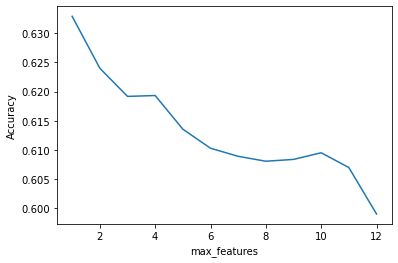

In [78]:
import matplotlib.pyplot as plt

plt.plot(max_features_r, accuracy_max_features)
plt.xlabel('max_features')
plt.ylabel('Accuracy')

### Predicción con la tabla de prueba

In [90]:
y_pred_VF = RFR.predict(dataTesting3)
y_pred_VF = pd.DataFrame(y_pred_VF, columns=['Price'])


In [91]:
y_pred_VF

,Price
0,31478.88
1,28032.58
2,12748.94
3,9903.82
4,27430.73
...,...
99995,25411.01
99996,30485.98
99997,32043.54
99998,27877.38


In [92]:
y_pred_VF.to_csv('test_submission_1.csv', index_label='ID')

In [1]:
import joblib

with open('proyecto_reg.pkl','wb') as archivo:

    joblib.dump(clf, archivo, compress=3)